### Python Fundamentals for Data Analysts
# Exercise 4.9: Intro to Data Visualization with Python
    

### Part 2: Perform Data Visualizations

### Content

1. Creating Bar Chart
2. Creating Histogram
3. Creating Scatterplot`m
4. Creating Line Chart
5. Create Histogram to see the number of orders based on hour of the day
6. Create Bar Chart for the distribution of orders among customers in terms of loyalty
7. Create Line Chart to see difference in expenditure depending on the hour of the day
8. Create Line Chart exploring the connections between age and number of dependents

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime

In [2]:
# Set path to access data files & Load data file
path = r'C:\Users\tsoew\OneDrive\Desktop\InstaCart Basket Analysis'

In [3]:
# Import latest version of combined data
df_combined = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ord_prod_combined_5.pkl'))

In [4]:
df_combined.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,freq_customer,first_name,last_name,gender,state,age,date_join,dependents,married,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


#### Step 1: Create BAR CHART

Text(0, 0.5, 'Number of orders')

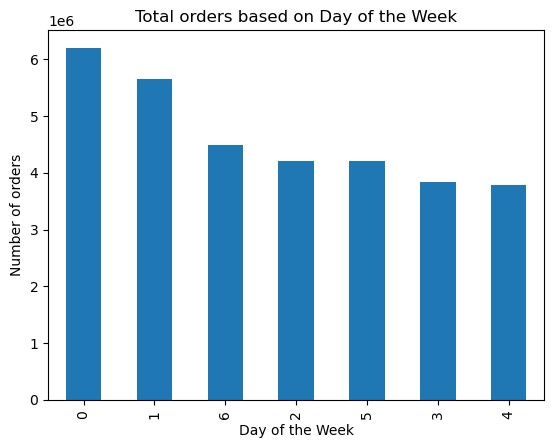

In [5]:
# Create Bar Chart for order day of the week column, from largest to smallest
df_combined['orders_day_of_week'].value_counts().plot.bar()
plt.title('Total orders based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')

Text(0, 0.5, 'Number of orders')

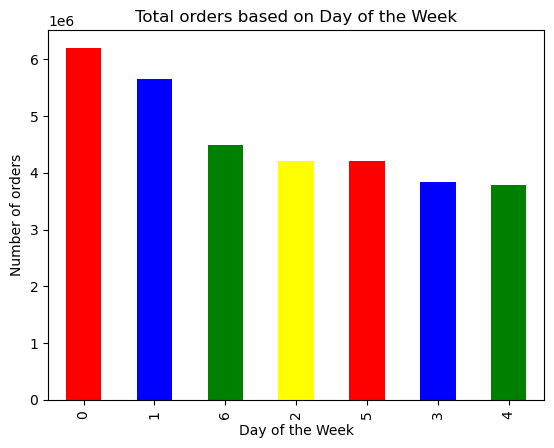

In [6]:
# Create Bar Chart for order day of the week column, use color
bar_chart_color = df_combined['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'blue', 'green', 'yellow'])
plt.title('Total orders based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')

Text(0, 0.5, 'Number of orders')

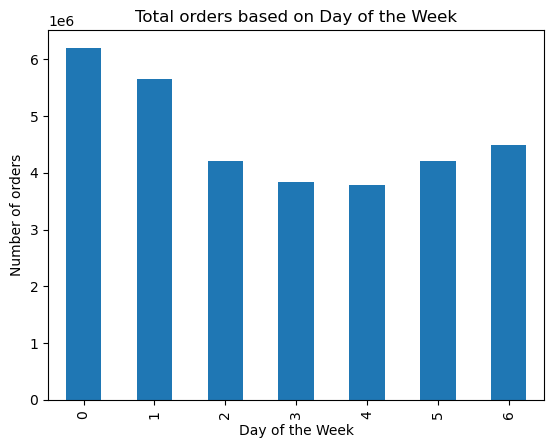

In [7]:
# Create Bar Chart for order day of the week column,sorted by index order
bar_chart = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Total orders based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')

In [8]:
# Save the image into a file
bar_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))
bar_chart_color.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow_color.png'))

#### Step 2: Creating Histogram

<Axes: ylabel='Frequency'>

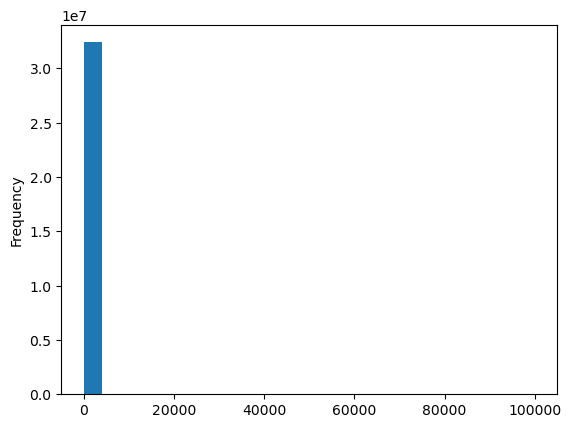

In [9]:
# Creating a histogram of the “prices” column. 
df_combined['prices'].plot.hist(bins = 25)

**Note**: There is a problem with this histogram because the prices are supposed to be spread out instead of one line.
    The number on x axis also shows a big number (100000) which means there might be some outliers in the prices column.
    We will investigate this by running descriptive analysis.

In [10]:
df_combined['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

**Note:** There seems to be a data corruption with the maximum value of 999999.

In [11]:
df_combined.loc[df_combined['prices'] >100].shape

(5127, 33)

**Note:** There are 5127 prices that are considered way beyond normal price.

In [12]:
# To fix this issue all prices above $100 will be replaced with NaN
df_combined.loc[df_combined['prices'] >100, 'prices'] = np.nan

In [13]:
df_combined['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

Text(0, 0.5, 'Frequency of Price')

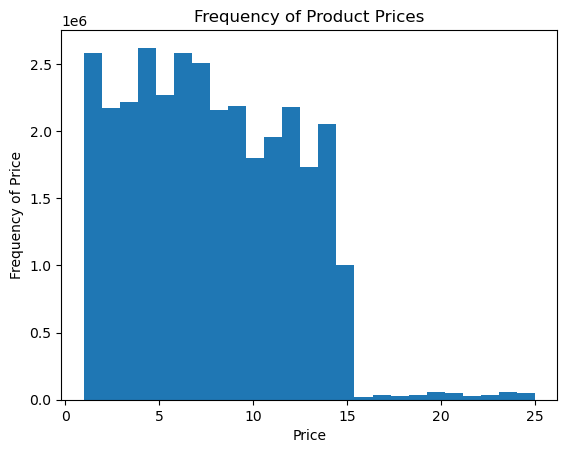

In [14]:
# Recreate the Histogram
hist_price = df_combined['prices'].plot.hist(bins = 25)
plt.title('Frequency of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency of Price')

In [15]:
# Save the image into a file
hist_price.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_price.png'))

#### Step 3: Creating Scatterplot

**Note:** Normally, you’d use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers. To do this for the current example, let’s try plotting the “prices” column against itself. This will reveal whether there are any outliers.

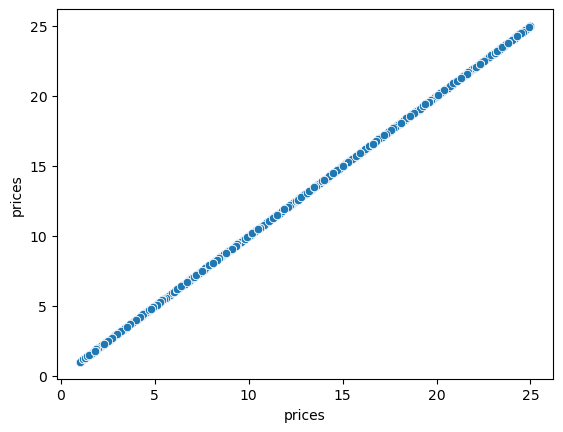

In [42]:
# Create Scatterplot for prices column
scatter_price = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [43]:
# Save the image into a file
scatter_price.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_price.png'))

#### Step 4: Creating Line Chart

**Note:**
    
Since creating line chart will require a great deal of memory, to perform line chart we will create a sample data.

A sample is a representative subsection of a population. In this case, you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows. 

#### Step 4.A.: Process of creating sample data

In [18]:
#ensuring that the random distribution we’re creating is reproducible. 
np.random.seed(4)
#Code a logical test comparing each of those numbers to a value of 0.7.
dev = np.random.rand(len(df_combined)) <= 0.7

Steps to produce random sample:
    
1. Set the seed for the random number generator.
2. Create 32,404,859 random numbers (the length of your df_combined dataframe) ranging between 0 and 1.
3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [19]:
# Store 70% of the sample in the dataframe big
big = df_combined[dev]

In [20]:
# Store 30% of the sample in the dataframe small
small = df_combined[~dev]

In [21]:
# Chop off other columns to reduce memory usage
df_2 = small[['orders_day_of_week','prices']]

Start time: 16:19:23


C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


End time: 16:24:03


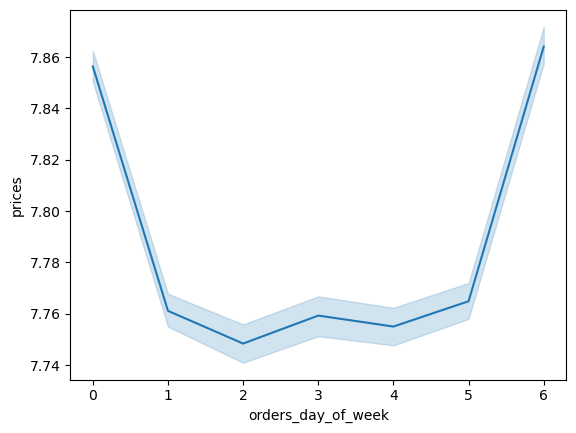

In [23]:
# Ready to create the line chart
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
line_order_dow = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

The translucent blue bands are around your line are called **error bands**. They represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

In [24]:
# Save the image into a file
line_order_dow.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_order_dow.png'))


#### Step 5: Create Histogram to see the number of orders based on hour of the day

This graph is used to answer Question #3: 

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

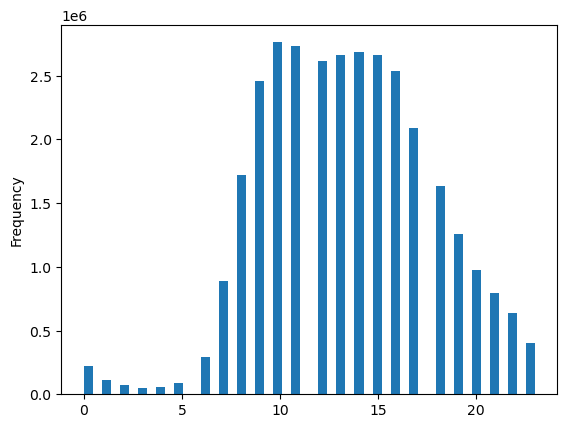

In [25]:
# Creating a histogram of the “order_hour_of_day” column. 
hist_order_hod = df_combined['order_hour_of_day'].plot.hist(bins = 50)

**Note**: the Histrogram shows that customer peak orders are from 8AM to 5PM of the day, and there are very small number of orders from 12AM to 5AM.
    
    

In [26]:
# Save the image into a file
hist_order_hod.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_order_hod.png'))

#### Step 6: Create Bar Chart for the distribution of orders among customers in terms of loyalty


Question #4:
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

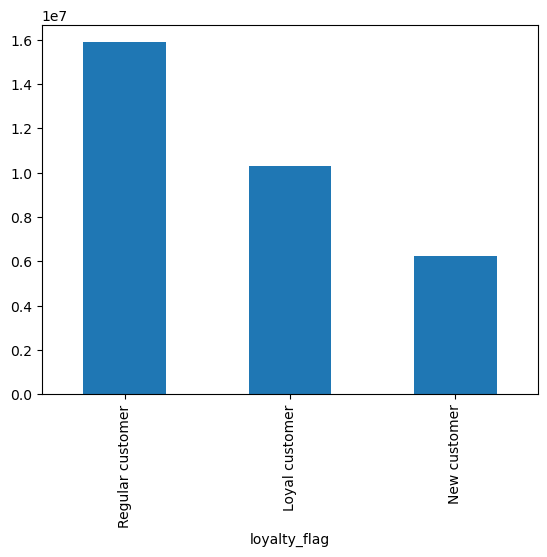

In [27]:
# Create Bar Chart for loyalty_flag column, from largest to smallest
bar_loyalty = df_combined['loyalty_flag'].value_counts().plot.bar()

**Note**: Histogram shows that the biggest proportion is Regular Customers, followed by Loyal Customers.

In [28]:
# Save the image into a file
bar_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty.png'))

#### Step 7: Create Line Chart to see difference in expenditure depending on the hour of the day.

Question #5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [29]:
# Reuse subset of dataframe from previous line of codes
# Extract only order_hour_of_day and prices columns
df_3 = small[['order_hour_of_day','prices']]

Start time: 16:24:08


C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


End time: 16:26:46


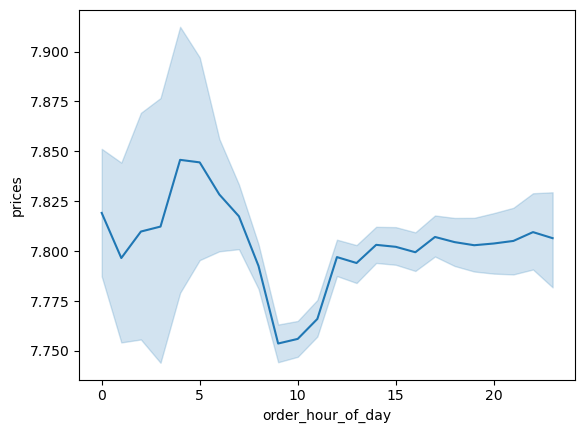

In [30]:
# Ready to create the line chart
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
line_order_hod = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

**Note:** This line chart shows that customers who order between 12AM to 5AM tend to buy slightly more expensive items, and the lowest spending is around 10AM.

In [31]:
# Save the image into a file
line_order_hod.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_order_hod.png'))


#### Step 8: Create Line chart exploring the connections between age and number of dependents

In [32]:
# Extract age and dependents columns from the subset of Dataframe
df_4 = small[['age','dependents']]

Start time: 16:26:47


C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


End time: 16:29:01


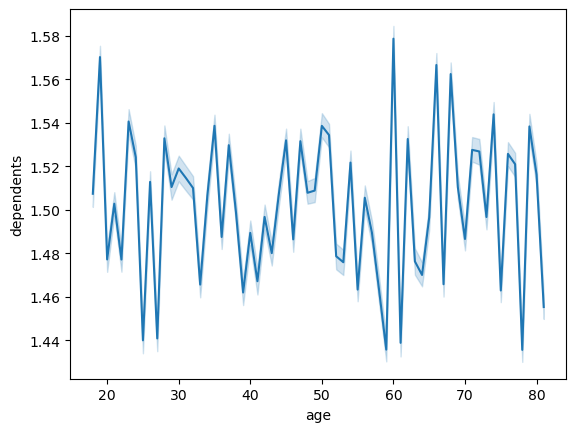

In [33]:
# Ready to create the line chart
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
line_age_dependent = sns.lineplot(data = df_4, x = 'age', y = 'dependents')
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

**Note**: This line chart shows that there is no particular connection between age of customers and their dependents.

In [34]:
# Save the image into a file
line_age_dependent.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_dependent.png'))

#### Step 9: Create Scatterplot to explore whether there’s a connection between age and spending power (income)

In [35]:
# Extract age and income columns from the subset of Dataframe
df_5 = small[['age','income']]

Start time: 16:29:02
End time: 16:29:04


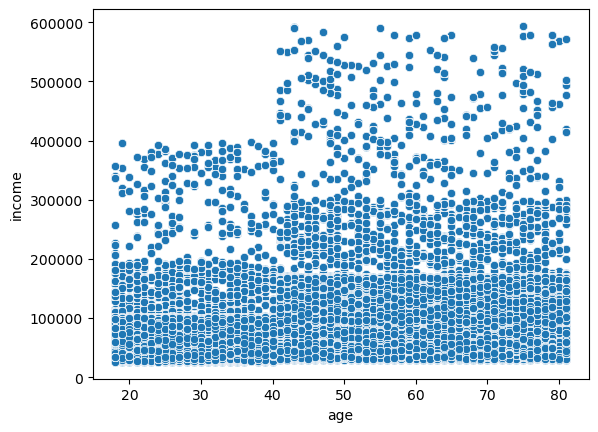

In [36]:
# Create Scatterplot for age and income column
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_5)
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

**Note**: Most customers under 40 year old have income level under 200,000 with some reach as high as 400,000.
    But once pass age 40, some income level goes up beyond 500,000, and many customers reaches a new height of 300,000.
The plot also shows that older people have better jobs and some people work beyond their retirement age earning good income.

In [37]:
# Perform descriptive to double check result
df_5.describe()

,age,income
count,9.721098e+06,9.721098e+06
mean,4.946312e+01,9.944555e+04
std,1.848655e+01,4.308561e+04
min,1.800000e+01,2.590300e+04
25%,3.300000e+01,6.699100e+04
50%,4.900000e+01,9.663000e+04
75%,6.500000e+01,1.279160e+05
max,8.100000e+01,5.939010e+05


In [38]:
# Run aggregation
df_5.groupby('age').agg({'income': ['mean']})

,income
,mean
age,
18,70386.264256
19,69720.987552
20,70767.283189
21,70676.339965
22,69971.477298
...,...
77,116617.395614
78,117178.072269


In [39]:
# Save the image into a file
scatter_age_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_age_income.png'))

In [40]:
df_combined.shape

(32404859, 33)

In [41]:
# Now export the updated dataframe to a pkl file, and name it orders_products_combined_ver4.pkl

print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
df_combined.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ord_prod_combined_6.pkl'))
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

Start time: 16:30:01
End time: 16:31:45


# End